<a href="https://colab.research.google.com/github/muntazirabidi/machine_learning_tutorials/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from sklearn.datasets import fetch_openml

In [30]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [31]:
import numpy as np
X, y = mnist['data'], mnist['target']
print(x.shape)
print(y.shape)



(70000, 784)
(70000,)


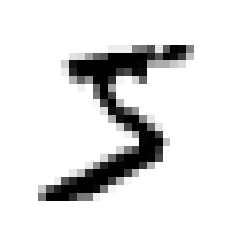

In [32]:
from IPython.display import set_matplotlib_formats
import matplotlib as mpl
import matplotlib.pyplot as plt 
some_digit = X.to_numpy()[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap="binary")
plt.axis('off')
plt.show()

In [36]:
y=y.astype(np.uint8)

In [58]:
X_train, X_test, y_train, y_test = X.to_numpy()[:60000], X.to_numpy()[60000:], y.to_numpy()[:60000], y.to_numpy()[60000:]

In [59]:
# Binary Classifier
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [60]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [63]:
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

# Measuring Accuracy Using Cross-Validation

A good way to evaluate a model is to use the cross-validation.

In [66]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  print(train_index, test_index)
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]  

  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))


[    1     3     4 ... 59994 59996 59998] [    0     2     6 ... 59995 59997 59999]
0.9669
[    0     2     3 ... 59997 59998 59999] [    1    10    11 ... 59988 59989 59991]
0.91625
[    0     1     2 ... 59995 59997 59999] [    3     4     5 ... 59994 59996 59998]
0.96785
